In [38]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from prettytable import PrettyTable

df = pd.read_csv("train.tsv", header=None, sep="\t", names=[
    'ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Job', 'State', 'Party',
    'Barely True', 'False', 'Half True', 'Mostly True', 'Pants On Fire', 'Context'])

df.head()
    

,ID,Label,Statement,Subject,Speaker,Job,State,Party,Barely True,False,Half True,Mostly True,Pants On Fire,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


republican: 4497
democrat: 3336
none: 1744
organization: 219
independent: 147
columnist: 35
activist: 39
talk-show-host: 26
libertarian: 40
newsmaker: 56
journalist: 38
labor-leader: 11
state-official: 20
business-leader: 9
education-official: 2
tea-party-member: 10
green: 3
liberal-party-canada: 1
government-body: 1
Moderate: 1
democratic-farmer-labor: 1
ocean-state-tea-party-action: 1
constitution-party: 1


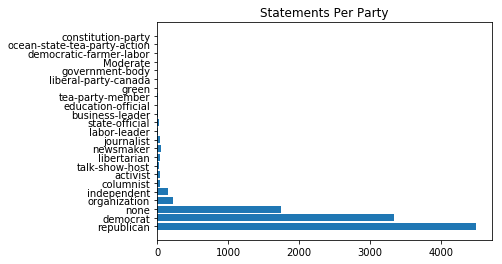

In [39]:
parties = pd.unique(df['Party'].dropna())
x_axis = np.arange(len(parties))
y_axis = []
for p in parties:
    count = 0
    for q in df['Party']:
        if q == p:
            count = count + 1
            
    y_axis.append(count)
    print("{}: {}".format(p, count))
    
plt.barh(parties, y_axis)
plt.title('Statements Per Party')
plt.show()

In [48]:
#  Truth breakdown of each speaker
list_speakers = list(dict.fromkeys(df.dropna()['Speaker']))

for s in list_speakers:
    is_s = df['Speaker'] == s
    
    score = 0
    total_count = 0
    
    for l in df[is_s]['Label']:
        total_count = total_count + 5
        if l == 'pants-fire': pass
        elif l == 'false': score = score + 1
        elif l == 'barely-true': score = score + 2
        elif l == 'half-true': score = score + 3
        elif l == 'mostly-true': score = score + 4
        elif l == 'true': score = score + 5
            
    truth_score = (score / total_count) * 100
    
    print('{}: {}%'.format(s, truth_score))

agenda-project: 50.0%
new-jersey-senate-democrats: 80.0%
james-clyburn: 46.666666666666664%
jerry-patterson: 70.0%
rebecca-bell-metereau: 40.0%
institute-womens-policy-research: 100.0%
jesse-jackson: 50.0%
paul-ryan: 59.285714285714285%
jim-mcgreevey: 60.0%
silvestre-reyes: 46.666666666666664%
william-weld: 60.0%
edith-ajello: 60.0%
john-mckeon: 60.0%
loretta-sanchez: 45.0%
tim-canova: 70.0%
alberto-carvalho: 60.0%
ginny-brown-waite: 53.333333333333336%
tom-cotton: 43.63636363636363%
john-burton: 100.0%
penny-pritzker: 80.0%
laurie-monnes-anderson: 100.0%
fred-clark: 60.0%
dennis-kucinich: 80.0%
heather-fiorentino: 0.0%
suzanne-devlin: 80.0%
sheila-oliver: 68.0%
dan-flynn: 20.0%
jay-webber: 100.0%
stefani-carter: 60.0%
jeff-fitzgerald: 43.333333333333336%
scott-maddox: 60.0%
herb-garrett: 80.0%
keep-conservatives-united: 20.0%
william-howell: 66.66666666666666%
beto-orourke: 60.0%
efrain-de-la-fuente: 60.0%
john-kitzhaber: 65.71428571428571%
dean-cannon: 70.0%
susan-sosnowski: 60.0%
ar

orrin-hatch: 70.0%
alan-hays: 60.0%
fred-risser: 20.0%
blake-rocap: 40.0%
sandy-pasch: 53.333333333333336%
peter-defazio: 63.33333333333333%
jim-webb: 80.0%
stacey-evans: 60.0%
marco-rubio: 56.92307692307692%
mark-obenshain: 80.0%
dave-obey: 60.0%
steve-archambault: 40.0%
ward-armstrong: 24.0%
lauren-hitt: 20.0%
george-flinn: 10.0%
george-turner: 100.0%
renee-ellmers: 40.0%
michelle-malkin: 60.0%
kelly-cassidy: 40.0%
kim-thatcher: 80.0%
farouk-shami: 30.0%
oregon-food-bank: 60.0%
austin-independent-school-district: 40.0%
michelle-rehwinkel-vasilinda: 100.0%
robert-dimuccio: 100.0%
sensible-transportation-solutions-austin-pac: 40.0%
now-or-never-pac: 20.0%
barth-bracy: 50.0%
michael-madigan: 60.0%
joe-negron: 70.0%
carlos-gimenez: 20.0%
lauren-kane: 60.0%
raphael-warnock: 100.0%
rudy-giuliani: 52.22222222222223%
john-duncan: 30.0%
john-loud: 80.0%
linda-mcmahon: 20.0%
john-e-sununu: 20.0%
mike-turzai: 60.0%
steve-stockman: 20.0%
richard-woods: 100.0%
dennis-algiere: 100.0%
todd-hunter: 

jim-cooper: 100.0%
kathleen-passidomo: 100.0%
helio-melo: 0.0%
dolores-gresham: 20.0%
tim-kaine: 67.72727272727272%
emanuel-cleaver: 40.0%
bill-batchelder: 37.142857142857146%
tom-barrett: 55.65217391304348%
jennie-lou-leeder: 100.0%
barack-obama: 65.0%
daily-caller: 20.0%
jack-kingston: 63.33333333333333%
phil-kerpen: 80.0%
dennis-baxley: 60.0%
rob-cornilles: 57.14285714285714%
kay-bailey-hutchison: 56.92307692307692%
molly-white: 60.0%
jack-berry: 60.0%
dave-brat: 55.55555555555556%
bryan-long: 60.0%
joe-garcia: 20.0%
victoria-jackson: 0.0%
tom-coburn: 52.5%
courtney-combs: 0.0%
john-morgan: 30.0%
louie-gohmert: 27.500000000000004%
helen-glover: 53.333333333333336%
kirk-watson: 93.33333333333333%
alex-wan: 60.0%
duncan-hunter: 75.0%
brian-anderson: 80.0%
chris-jacobs: 20.0%
michael-steele: 46.666666666666664%
yvette-mcgee-brown: 100.0%
danny-porter: 60.0%
bill-weimer: 100.0%
heidi-group: 100.0%
bart-stupak: 66.66666666666666%
daniel-rodriguez: 80.0%
garnet-coleman: 50.0%
mary-olson: 

david-barton: 60.0%
jeffrey-grybowski: 80.0%
chuck-hagel: 60.0%
carlos-curbelo: 50.0%
steve-chabot: 40.0%
scott-peters: 80.0%
health-care-america-now: 33.33333333333333%
dianne-feinstein: 60.0%
scott-fitzgerald: 30.0%
mark-hinkle: 100.0%
bob-beckel: 60.0%
sal-albanese: 20.0%
carlos-trujillo: 20.0%
john-g-morgan: 100.0%
ann-kirkpatrick: 60.0%
ralph-mollis: 40.0%
gary-cobb: 40.0%
chris-christie: 58.20512820512821%
scott-lingamfelter: 80.0%
george-voinovich: 100.0%
kelli-stargel: 40.0%
matt-lundy: 100.0%
ann-coulter: 32.72727272727273%
steve-oroho: 60.0%
workers-voice: 10.0%
matthew-hill: 20.0%
ben-nelson: 20.0%
christine-sinicki: 20.0%
kathy-nickolaus: 40.0%
vern-buchanan: 55.00000000000001%
patience-roggensack: 93.33333333333333%
katrina-shankland: 40.0%
nicholas-mattiello: 40.0%
leah-vukmir: 50.0%
julian-castro: 80.0%
gordon-robertson: 0.0%
charles-van-zant: 40.0%
mario-diaz-balart: 90.0%
john-raese: 0.0%
jonathan-harris: 80.0%
reza-aslan: 80.0%
keith-parker: 100.0%
alex-mcmurtrie-jr: 